In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv(r"C:\Users\Sgoud\Clean_dataframe.csv",index_col=0)
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,Not Mentioned,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
1,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,Not Mentioned,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
2,2016-03-17 16:54:04,GOLF_4_1_4__3T�RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
3,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
4,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333848,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,Not Mentioned,2005,Not Mentioned,0,Not Mentioned,20000,1,Not Mentioned,sonstige_autos,Not Mentioned,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
333849,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
333850,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
333851,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,Not Mentioned,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [7]:
df.seller.value_counts()

privat        333850
gewerblich         3
Name: seller, dtype: int64

## 1.Can you tell me No of Vehicles by Brand Available on ebay for sale with the help of visualization

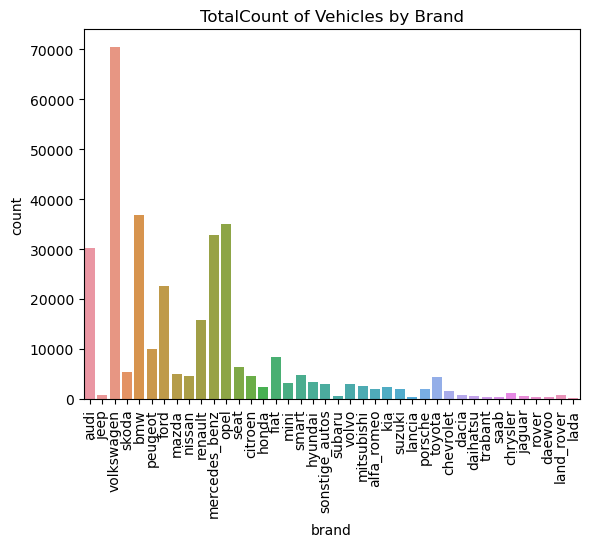

In [8]:
sns.countplot(data=df,x='brand')
plt.title('TotalCount of Vehicles by Brand')
plt.xticks(rotation='90')
plt.show()

# 2) What is the Average price for vehicles based on the type of
## vehicle as well as on the type of gearbox.Explain me with both
## numerical and visualization analysis

In [32]:
average_prices = df.groupby(['vehicleType','gearbox'])['price'].mean()
average_prices =pd.DataFrame(average_prices).reset_index()
average_price=average_prices [average_prices ['vehicleType']!="andere"]
average_price 

,vehicleType,gearbox,price
0,Not Mentioned,Not Mentioned,44246.414724
1,Not Mentioned,automatik,5677.514460
2,Not Mentioned,manuell,3638.753132
6,bus,Not Mentioned,5887.018838
7,bus,automatik,10851.600880
8,bus,manuell,6463.507095
9,cabrio,Not Mentioned,11085.340206
10,cabrio,automatik,16538.948755
11,cabrio,manuell,9121.942795
12,coupe,Not Mentioned,61770.912195


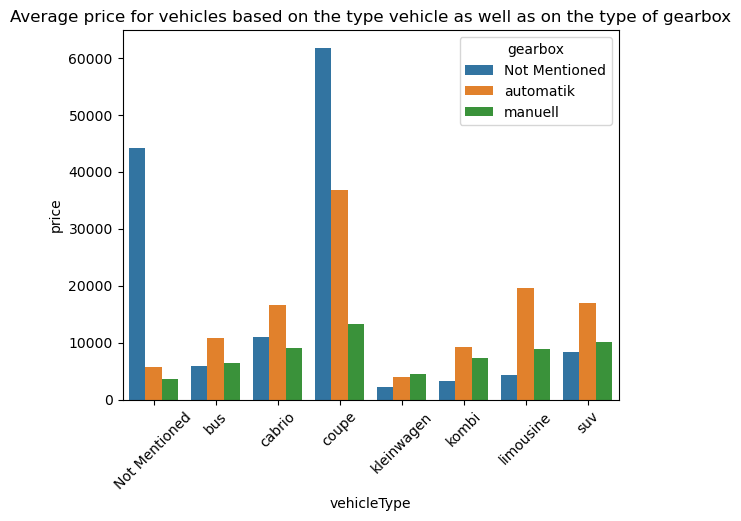

In [34]:
sns.barplot(x=average_price['vehicleType'],y=average_price['price'],hue=average_price['gearbox'])
plt.title("Average price for vehicles based on the type vehicle as well as on the type of gearbox")
plt.xticks(rotation=45)
plt.show()

In [27]:
average_prices_1=average_prices[average_prices['vehicleType']=="andere"]
average_prices_1

,vehicleType,gearbox,price
3,andere,Not Mentioned,5028.300000
4,andere,automatik,7342.218354
5,andere,manuell,958974.718393


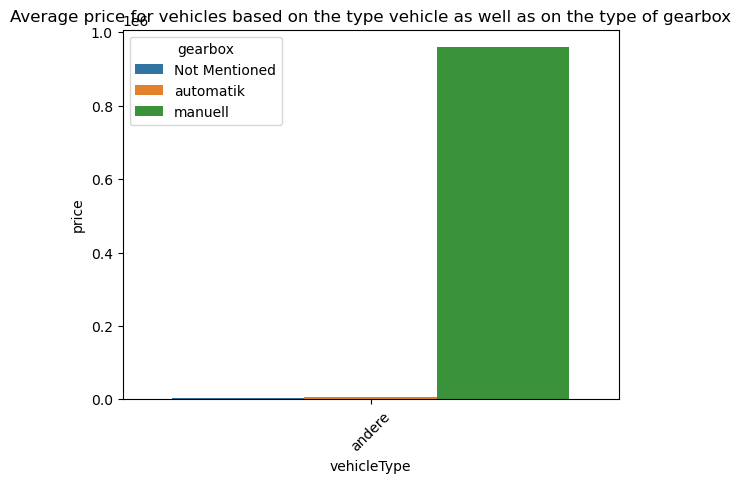

In [35]:
sns.barplot(x=average_prices_1['vehicleType'],y=average_prices_1['price'],hue=average_prices_1['gearbox'])
plt.title("Average price for vehicles based on the type vehicle as well as on the type of gearbox")
plt.xticks(rotation=45)
plt.show()

In [18]:
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,Not Mentioned,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
1,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,Not Mentioned,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
2,2016-03-17 16:54:04,GOLF_4_1_4__3T�RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
3,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
4,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333848,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,Not Mentioned,2005,Not Mentioned,0,Not Mentioned,20000,1,Not Mentioned,sonstige_autos,Not Mentioned,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
333849,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
333850,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
333851,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,Not Mentioned,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


# 3.What is the marginal probability of private seller
 

In [30]:
pd.crosstab(index=df['seller'],columns=['notRepairedDamage'],margins=True)

col_0,notRepairedDamage,All
seller,,
gewerblich,3,3
privat,333850,333850
All,333853,333853


In [29]:
total_observations = len(df)
count_private_seller = len(df[df["seller"] == "privat"])
marginal_probability_private_seller = count_private_seller / total_observations

In [30]:
marginal_probability_private_seller

0.9999910140091597